In [1]:
import pandas as pd
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
data1 = data.drop(['day','month','contact','pdays'],axis='columns')
data1.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,1042,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,1467,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,673,2,0,unknown,yes


In [3]:
data1[data1['job']=='unknown'].count()['job']

70

In [4]:
data1.drop(data1[data1['job']=='unknown'].index,inplace=True)
len(data1)


11092

In [5]:
data1.drop(data1[data1['education']=='unknown'].index,inplace=True)
len(data1)

10634

In [6]:
data1.drop(data1[data1['poutcome']=='unknown'].index,inplace=True)
len(data1)


2693

In [7]:
data1.drop(data1[data1['poutcome']=='other'].index,inplace=True)
data_inputs = data1.drop('deposit', axis = 'columns')
data_target = data1['deposit']
len(data_inputs)

2181

In [8]:
len(data_target)

2181

In [9]:
data_inputs.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome
891,33,services,married,secondary,no,3444,yes,no,144,1,4,failure
899,56,technician,married,secondary,no,589,yes,no,518,1,2,success
933,34,admin.,married,tertiary,no,899,yes,no,114,1,3,failure
951,53,retired,married,tertiary,no,2269,no,no,1091,2,1,success
952,37,technician,married,secondary,no,5115,yes,no,1210,2,4,failure


In [10]:
import matplotlib 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

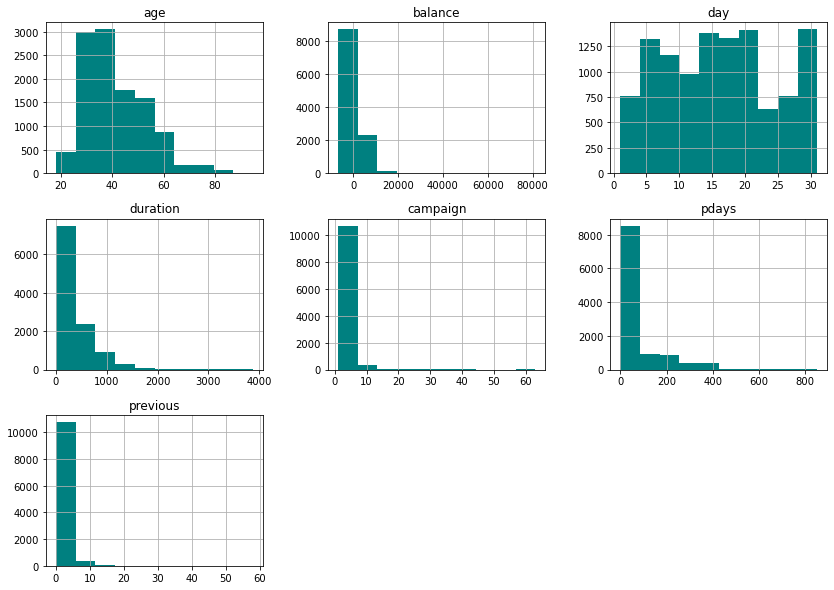

In [11]:
import matplotlib.pyplot as plt

data.hist(figsize=(14,10), color='#008080')
plt.show()

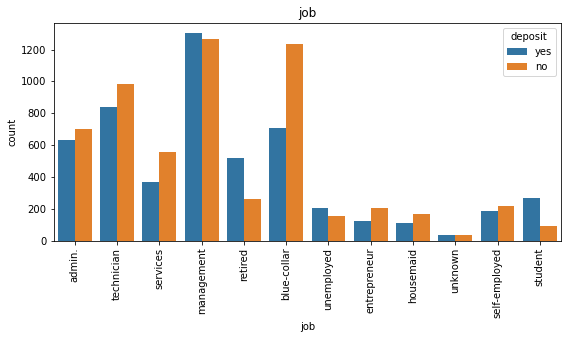

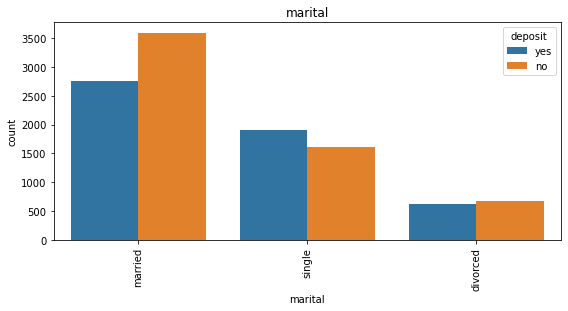

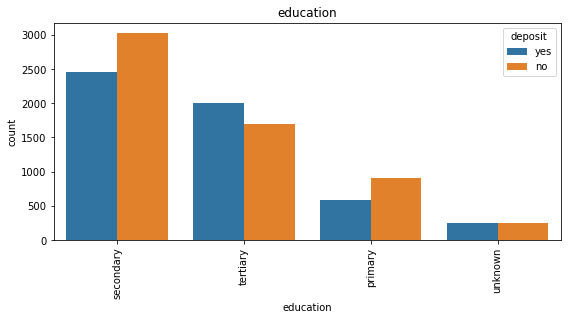

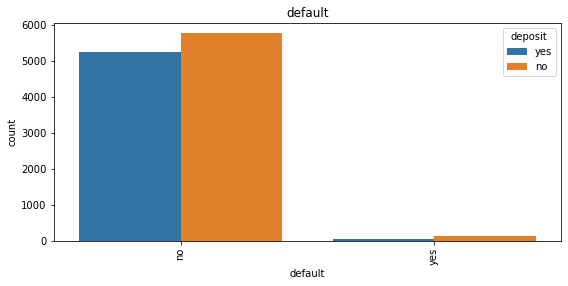

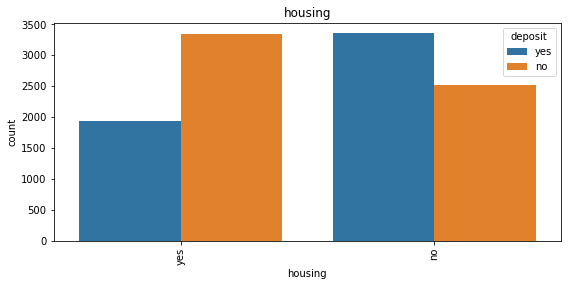

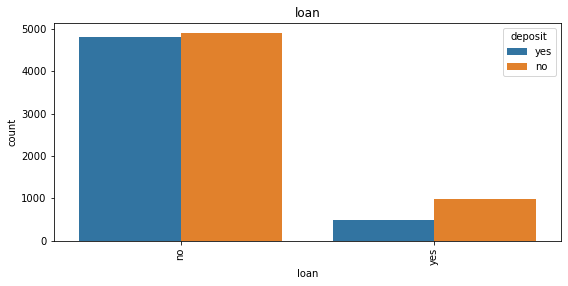

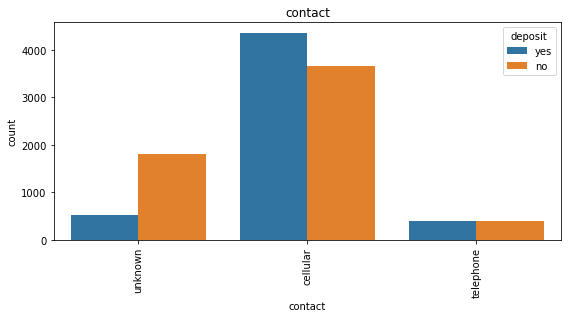

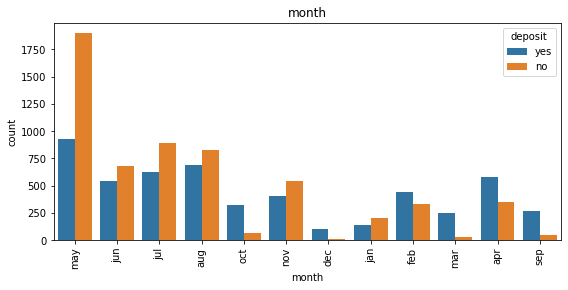

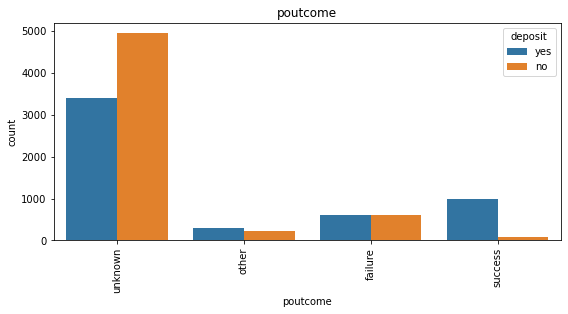

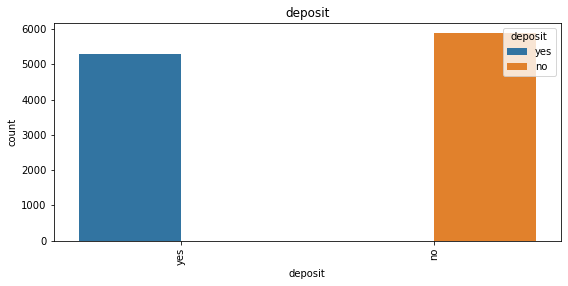

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
categorical_data = data.select_dtypes(exclude=np.number)    
categorical_col = categorical_data.columns 
for column in categorical_col:
    plt.figure(figsize=(20,4)) 
    plt.subplot(121)
    sns.countplot(x=data[column],hue=data['deposit'],data=data) 
    plt.title(column)
    plt.xticks(rotation=90)


In [13]:
data.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [14]:
data.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [15]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [16]:
X = data.drop(['deposit','job', 'education', 'marital', 'contact', 'day','month','poutcome' ], axis=1) 
y = data['deposit']
X = pd.get_dummies(X) 
y = pd.get_dummies(y)
X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'}) 
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=50)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8929, 11) (2233, 11) (8929, 1) (2233, 1)


In [18]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test)) 
X_train2.columns = X_train.columns.values 
X_test2.columns = X_test.columns.values 
X_train2.index = X_train.index.values 
X_test2.index = X_test.index.values
X_train = X_train2 
X_test = X_test2

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn import metrics
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=4) 
classifier.fit(X_train, y_train)

#Predi cting   the  best    set    resuLI 
y_pred = classifier.predict(X_test) 
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred) 
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']) 
print(model_results)

           Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.786386   0.830492  0.746383  0.786195


In [19]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1058
           1       0.83      0.75      0.79      1175

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



In [20]:
print(metrics.confusion_matrix(y_test, y_pred))

[[879 179]
 [298 877]]
